In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'


es = EarlyStopping(monitor = "val_loss", mode = "min", patience = 10) #inna wartość!!

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data()
EPOCHS = 1000

c:\Users\Lenovo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Stwórz prostą sieć neuronową. Ile neuronów powinno być w ostatniej warstwie? Jaka funkcja
# aktywacji? Do wspólnego zastanowienia.
# Funkcja liniowa, 1 neuron wyjściowy.

# Jaką funkcję straty wykorzystać podczas kompilacji? Jakie metryki śledzić?
# "mse", "mae" jako funkcja straty; nie potrzebujemy accuracy 

# Wytrenuj model.
# Wyświetl wykresy funkcji straty dla zbioru treningowego i walidacyjnego.

In [3]:
print(x_train.shape)
print(y_train.shape)

(404, 13)
(404,)


In [4]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=13))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='linear'))
model.add(Dense(1))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3,249
Trainable params: 3,249
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = model.fit(x_train, y_train, epochs=EPOCHS, validation_split=0.2, callbacks=[es])

Epoch 1/1000
11/11 [==============================] - 2s 80ms/step - loss: 501.9704 - mae: 16.7080 - val_loss: 149.7575 - val_mae: 9.0090
Epoch 2/1000
11/11 [==============================] - 0s 25ms/step - loss: 84.6840 - mae: 6.9202 - val_loss: 98.0712 - val_mae: 7.5413
Epoch 3/1000
11/11 [==============================] - 0s 9ms/step - loss: 81.0442 - mae: 6.9383 - val_loss: 76.5094 - val_mae: 5.5346
Epoch 4/1000
11/11 [==============================] - 0s 9ms/step - loss: 55.7070 - mae: 5.3019 - val_loss: 66.4776 - val_mae: 5.6183
Epoch 5/1000
11/11 [==============================] - 0s 8ms/step - loss: 54.6203 - mae: 4.9822 - val_loss: 64.6539 - val_mae: 5.5670
Epoch 6/1000
11/11 [==============================] - 0s 8ms/step - loss: 55.4118 - mae: 5.4915 - val_loss: 71.5098 - val_mae: 5.2593
Epoch 7/1000
11/11 [==============================] - 0s 8ms/step - loss: 54.5980 - mae: 4.9980 - val_loss: 62.7483 - val_mae: 5.5375
Epoch 8/1000
11/11 [==============================] - 0s 

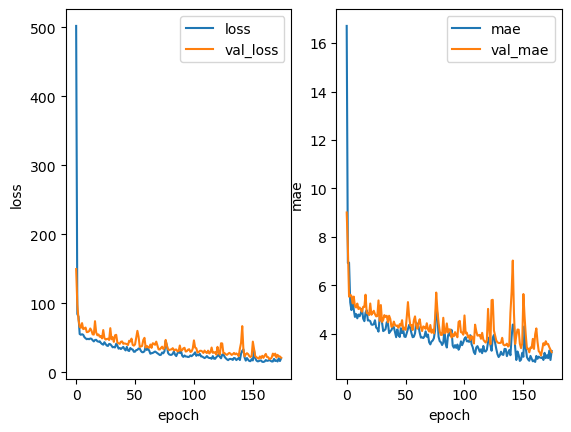

<Figure size 640x480 with 0 Axes>

In [6]:
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']
plt.subplot(1,2,1)
plt.plot(loss, label = "loss")
plt.plot(val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(mae, label = "mae")
plt.plot(val_mae, label = "val_mae")
plt.xlabel("epoch")
plt.ylabel("mae")
plt.legend()
plt.show()
plt.tight_layout()